array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1169199b0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x116bdaac8>]], dtype=object)

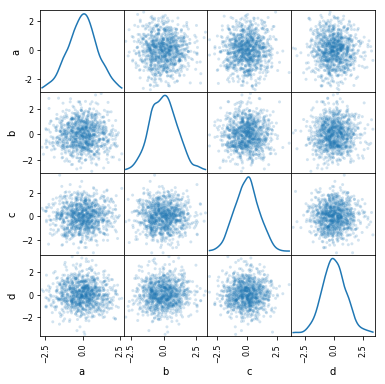

In [4]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.randn(1000, 4), columns=['a', 'b', 'c', 'd'])

scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')

### Density Plot
You can create density plots using the **Series.plot.kde()** and **DataFrame.plot.kde()** methods

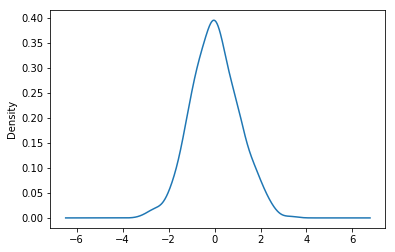

In [5]:
ser = pd.Series(np.random.randn(1000))

ser.plot.kde()

### Andrews Curves
Andrews曲线是将每个样本的属性值转化为傅里叶序列的系数来创建曲线。通过将每一类曲线标成不同颜色可以可视化聚类数据，属于相同类别的样本的曲线通常更加接近并构成了更大的结构

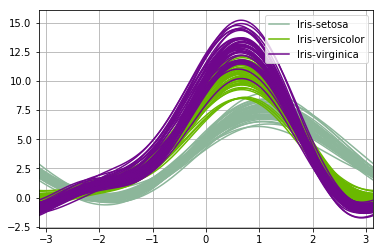

In [9]:
from pandas.plotting import andrews_curves

data = pd.read_csv('./iris.data')

plt.figure()

andrews_curves(data, 'Name')

### Parallel Coordinates
平行坐标也是一种多维可视化技术。它可以看到数据中的类别以及从视觉上估计其他的统计量。使用平行坐标时，每个点用线段联接。每个垂直的线代表一个属性。一组联接的线段表示一个数据点。可能是一类的数据点会更加接近。

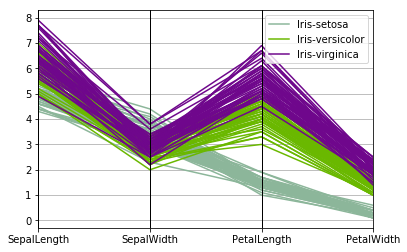

In [10]:
from pandas.plotting import parallel_coordinates

data = pd.read_csv('./iris.data')

plt.figure()

parallel_coordinates(data, 'Name')

### Lag Plot
延迟图用来检验一个数据集或者时间序列是否是随机的。在延迟图中随机数据不会展示出任何结构。非随机的结构暗示底层的数据不是随机的。

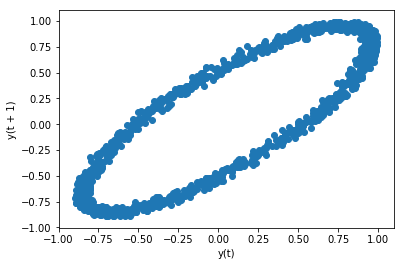

In [12]:
from pandas.plotting import lag_plot

plt.figure()

data = pd.Series(0.1 * np.random.rand(1000) +
                 0.9 * np.sin(np.linspace(-99 * np.pi, 99 * np.pi, num=1000)))

lag_plot(data)

### Autocorrelation Plot
Autocorrelation plots are often used for checking randomness in time series. This is done by computing autocorrelations for data values at varying time lags. If time series is random, such autocorrelations should be near zero for any and all time-lag separations. If time series is non-random then one or more of the autocorrelations will be significantly non-zero. The horizontal lines displayed in the plot correspond to 95% and 99% confidence bands. The dashed line is 99% confidence band.

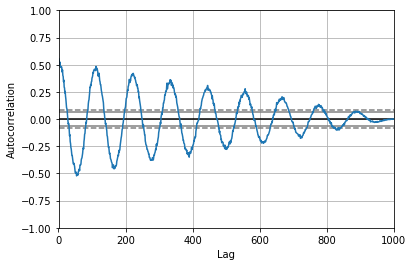

In [13]:
from pandas.plotting import autocorrelation_plot

plt.figure()

data = pd.Series(0.7 * np.random.rand(1000) +
                 0.3 * np.sin(np.linspace(-9 * np.pi, 9 * np.pi, num=1000)))

autocorrelation_plot(data)

### Bootstrap Plot
Bootstrap plots are used to visually assess the uncertainty of a statistic, such as mean, median, midrange, etc. A random subset of a specified size is selected from a data set, the statistic in question is computed for this subset and the process is repeated a specified number of times. Resulting plots and histograms are what constitutes the bootstrap plot.

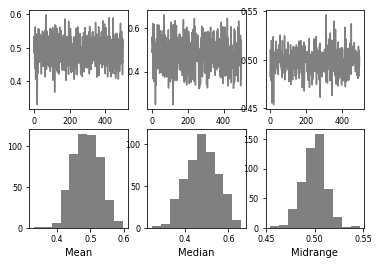

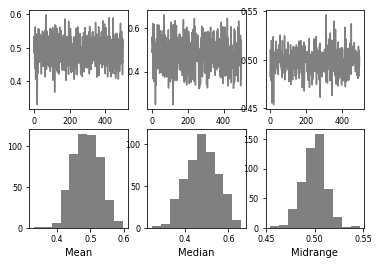

In [16]:
from pandas.plotting import bootstrap_plot

data = pd.Series(np.random.rand(1000))

bootstrap_plot(data, size=50, samples=500, color='grey')

### RadViz
RadViz是一种可视化多维数据的方式。它基于基本的弹簧压力最小化算法。简单来说，将一组点放在一个平面上，每一个点代表一个属性，每个数据集通过一个弹簧联接到每个点上，弹力和他们属性值成正比，数据集在平面上的位置是弹簧的均衡位置。不同类的样本用不同颜色表示。

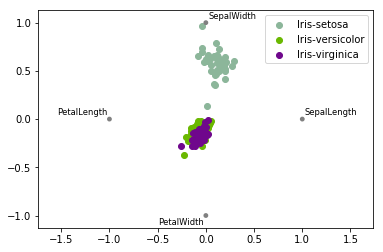

In [17]:
from pandas.plotting import radviz

data = pd.read_csv('./iris.data')

plt.figure()

radviz(data, 'Name')

### 因素分析
因素分析是基于高斯潜在变量的一个简单线性模型，假设每一个观察值都是由低维的潜在变量加正态噪音构成

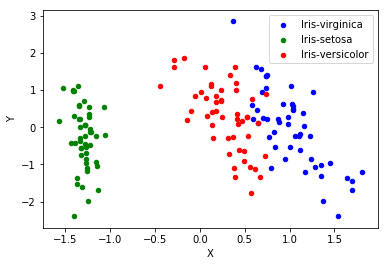

In [22]:
from sklearn import decomposition

pca = decomposition.FactorAnalysis(n_components=2)

X = pca.fit_transform(data.iloc[:,:-1].values)

pos=pd.DataFrame()

pos['X'] =X[:, 0]

pos['Y'] =X[:, 1]

pos['Name'] = data['Name']

ax = pos.loc[pos['Name']=='Iris-virginica'].plot(kind='scatter', x='X', y='Y', color='blue', label='Iris-virginica')

ax = pos.loc[pos['Name']=='Iris-setosa'].plot(kind='scatter', x='X', y='Y', color='green', label='Iris-setosa', ax=ax)

pos.loc[pos['Name']=='Iris-versicolor'].plot(kind='scatter', x='X', y='Y', color='red', label='Iris-versicolor', ax=ax)

### 主成分分析
主成分分析是由因子分析进化而来的一种降维的方法，通过正交变换将原始特征转换为线性独立的特征，转换后得到的特征被称为主成分。主成分分析可以将原始维度降维到n个维度，有一个特例情况，就是通过主成分分析将维度降低为2维，这样的话，就可以将多维数据转换为平面中的点，来达到多维数据可视化的目的。

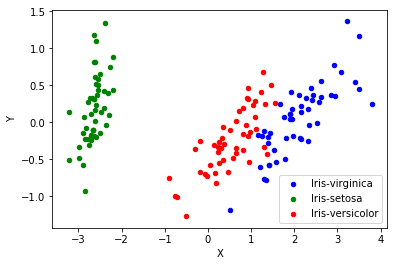

In [23]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)

X = pca.fit_transform(data.iloc[:,:-1].values)

pos=pd.DataFrame()

pos['X'] =X[:, 0]

pos['Y'] =X[:, 1]

pos['Name'] = data['Name']

ax = pos.loc[pos['Name']=='Iris-virginica'].plot(kind='scatter', x='X', y='Y', color='blue', label='Iris-virginica')

ax = pos.loc[pos['Name']=='Iris-setosa'].plot(kind='scatter', x='X', y='Y', color='green', label='Iris-setosa', ax=ax)

pos.loc[pos['Name']=='Iris-versicolor'].plot(kind='scatter', x='X', y='Y', color='red', label='Iris-versicolor', ax=ax)

可以看到保留的两个主成分，第一个主成分可以解释原始变异的92.3%，第二个主成分可以解释原始变异的5.3%。也就是说降成两维后仍保留了原始信息的97.8%。

In [24]:
pca.fit(data.ix[:,:-1].values).explained_variance_ratio_

array([ 0.92461621,  0.05301557])

### 独立成分分析
独立成分分析将多源信号拆分成最大可能独立性的子成分，它最初不是用来降维，而是用于拆分重叠的信号

/Users/meikun/anaconda3/envs/forecast/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


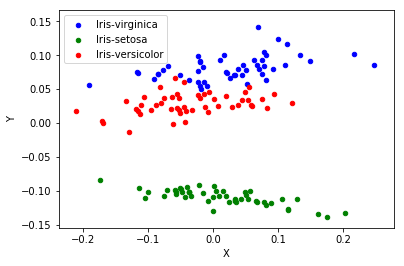

In [25]:
from sklearn import decomposition

pca = decomposition.FastICA(n_components=2)

X = pca.fit_transform(data.iloc[:,:-1].values)

pos=pd.DataFrame()

pos['X'] =X[:, 0]

pos['Y'] =X[:, 1]

pos['Name'] = data['Name']

ax = pos.loc[pos['Name']=='Iris-virginica'].plot(kind='scatter', x='X', y='Y', color='blue', label='Iris-virginica')

ax = pos.loc[pos['Name']=='Iris-setosa'].plot(kind='scatter', x='X', y='Y', color='green', label='Iris-setosa', ax=ax)

pos.loc[pos['Name']=='Iris-versicolor'].plot(kind='scatter', x='X', y='Y', color='red', label='Iris-versicolor', ax=ax)

### 多维度量尺
多维量表试图寻找原始高维空间数据的距离的良好低维表征。简单来说，多维度量尺被用于数据的相似性，它试图用几何空间中的距离来建模数据的相似性，直白来说就是用二维空间中的距离来表示高维空间的关系。数据可以是物体之间的相似度、分子之间的交互频率或国家间交易指数。这一点与前面的方法不同，前面的方法的输入都是原始数据，而在多维度量尺的例子中，输入是基于欧式距离的距离矩阵。多维度量尺算法是一个不断迭代的过程，因此，需要使用max_iter来指定最大迭代次数，同时计算的耗时也是上面算法中最大的一个。

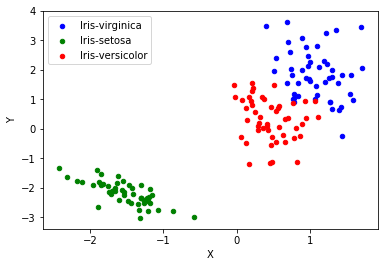

In [26]:
from sklearn import manifold

from sklearn.metrics import euclidean_distances

similarities = euclidean_distances(data.iloc[:,:-1].values)

mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, dissimilarity="precomputed", n_jobs=1)

X = mds.fit(similarities).embedding_

pos=pd.DataFrame(X, columns=['X', 'Y'])

pos['Name'] = data['Name']

ax = pos.loc[pos['Name']=='Iris-virginica'].plot(kind='scatter', x='X', y='Y', color='blue', label='Iris-virginica')

ax = pos.loc[pos['Name']=='Iris-setosa'].plot(kind='scatter', x='X', y='Y', color='green', label='Iris-setosa', ax=ax)

pos.loc[pos['Name']=='Iris-versicolor'].plot(kind='scatter', x='X', y='Y', color='red', label='Iris-versicolor', ax=ax)